# 图像卷积

In [4]:
import numpy as np
import imageio as imgio
import scipy as sci
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from scipy.ndimage.interpolation import zoom

In [17]:
# 引入二维卷积函数
def convolve_all_colours(im, window):
    """
    用窗口window卷积图像，依次对图像的每个通道卷积
    """
    ims = []
    # 用ims作为每个通道转换结果的暂存列表
    for d in range(3):
    # 对图像的三个通道循环处理
        im_conv_d = convolve2d(im[:,:,d], window, mode="same", boundary="symm")
        # mode决定输出尺寸，boundary决定边界条件，这里输出尺寸与原图相同，采用对称边界条件
        ims.append(im_conv_d)
        # 将单通道转换结果添加到列表

    im_conv = np.stack(ims, axis=2)
    im_conv = np.clip(im_conv,0,255)
    im_conv = np.uint8(im_conv)
    # 在第三维上堆叠ims列表中的每个元素，并通过astype保证值在0-255
    return im_conv

In [21]:
im = imgio.imread('../datas/f4.jpg')
imf = np.float32(im)
window = np.ones((3,3)).astype(np.float32)
window /= np.sum(window)
dst = convolve_all_colours(imf,window)

Text(0.5,1,'Convolve2D:window = 3x3')

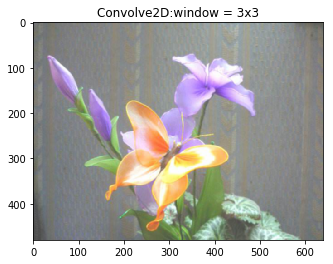

In [22]:
plt.imshow(dst)
plt.title('Convolve2D:window = 3x3')

Text(0.5,1,'Convolve2D:window = 11x11')

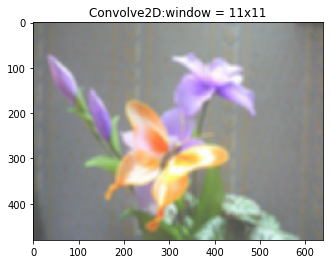

In [24]:
window = np.ones((11,11)).astype(np.float32)
window /= np.sum(window)
dst = convolve_all_colours(imf,window)
plt.imshow(dst)
plt.title('Convolve2D:window = 11x11')

Text(0.5,1,'Convolve2D:window = 63x63')

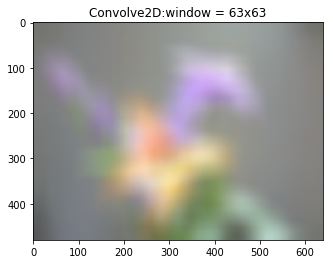

In [26]:
window = np.ones((63,63)).astype(np.float32)
window /= np.sum(window)
dst = convolve_all_colours(imf,window)
plt.imshow(dst)
plt.title('Convolve2D:window = 63x63')

In [27]:
def make_guassian_window(n, sigma=1):
    """
    使用高斯分布的权重创建一个n*n的方形窗口
    """
    nn = int((n-1)/2)
    a = np.asarray([[x**2 + y**2 for x in range(-nn,nn+1)] for y in range(-nn,nn+1)])
    # np.asarray可以将输入转化为np.array, 这里输入为一个列表推导式
    return np.exp(-a/(2*sigma**2))

In [31]:
window = make_guassian_window(7,sigma=2.4)
window /= np.sum(window)
dst = convolve_all_colours(imf,window)

Text(0.5,1,'Convolve2D:Gaussian Window = 7x7 sigma=2.4')

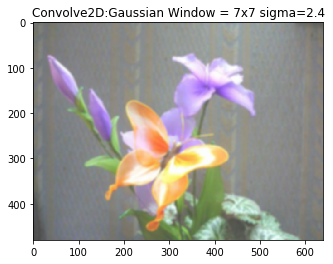

In [32]:
plt.imshow(dst)
plt.title('Convolve2D:Gaussian Window = 7x7 sigma=2.4')